In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets.cifar10 import load_data

from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

from tensorflow.keras.applications.vgg16 import VGG16
print(tf.__version__)

import matplotlib.pyplot as plt
import os
import random

2.1.0


设置一下cifar10中的类别名称，

In [2]:
classes_cifar10 = ['airplane','automobile','bird','cat','deer','dog',
                  'frog','horse','ship','truck']

引入训练集与测试集

In [3]:
(X_train, y_train), (X_test,y_test) = load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

定义方法并查看几个图片

In [6]:
def show_images(num):
    for i in range(num):
        idx = random.randint(0,len(X_train))
        plt.imshow(X_train[idx])
        plt.title(classes_cifar10[int(y_train[idx])])
        plt.show()

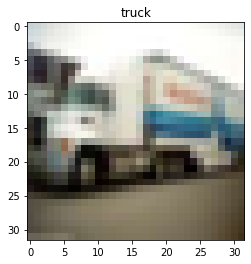

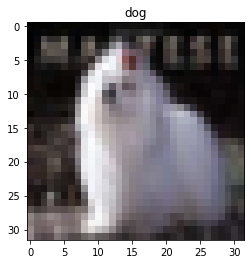

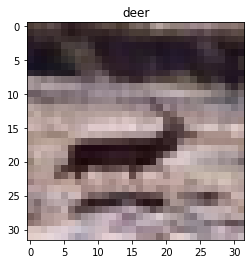

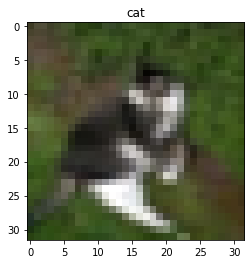

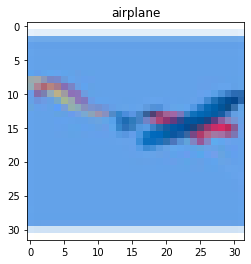

In [7]:
show_images(5)

In [8]:
pre_trained_model = VGG16(input_shape=(32,32,3)
                          ,include_top=False
                          ,weights='imagenet')

In [9]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [10]:
for layer in pre_trained_model.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [11]:
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape:', last_layer.output_shape)

last layer output shape: (None, 1, 1, 512)


In [12]:
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [13]:
last_output = last_layer.output
x = Flatten()(last_output)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output = Dense(10, activation='softmax')(x)

In [14]:
model = keras.Model(pre_trained_model.input, output)

In [15]:
model.compile(optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [17]:

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [18]:
history = model.fit(X_train,y_train, epochs=500, 
                    validation_data=(X_test, y_test),
                   callbacks=[#tensorboard_cb, 
                              early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 22s 450us/sample - loss: 1.6408 - accuracy: 0.4382 - val_loss: 1.2326 - val_accuracy: 0.5733
Epoch 2/500
50000/50000 [==============================] - 17s 332us/sample - loss: 1.3356 - accuracy: 0.5305 - val_loss: 1.1517 - val_accuracy: 0.5993
Epoch 3/500
50000/50000 [==============================] - 17s 333us/sample - loss: 1.2485 - accuracy: 0.5632 - val_loss: 1.1189 - val_accuracy: 0.6120
Epoch 4/500
50000/50000 [==============================] - 17s 336us/sample - loss: 1.2041 - accuracy: 0.5793 - val_loss: 1.0887 - val_accuracy: 0.6197
Epoch 5/500
50000/50000 [==============================] - 17s 337us/sample - loss: 1.1655 - accuracy: 0.5925 - val_loss: 1.0754 - val_accuracy: 0.6245
Epoch 6/500
50000/50000 [==============================] - 17s 339us/sample - loss: 1.1349 - accuracy: 0.6045 - val_loss: 1.0608 - val_accuracy: 0.6281
Epoch 7/500
50000/50000 [=============

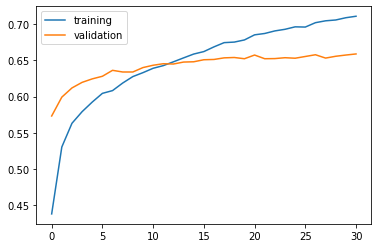

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

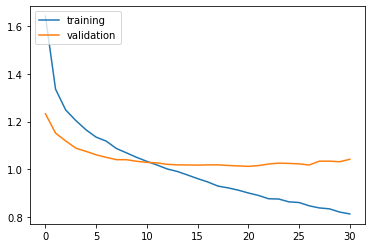

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()